In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df

,From Date,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,COy1,Ozoney1,...,Ozone,RH,WS,WD,SR,BP,AT,year,month,day
0,735966,318.998571,480.381429,159.387143,95.130000,302.424286,82.168571,39.745714,2.932857,46.822857,...,55.380000,60.705714,0.887143,167.552857,61.578571,736.275714,12.331429,2016,1,3
1,735973,289.505714,472.055714,228.792857,84.445714,387.365714,92.285714,40.324286,5.032857,45.618571,...,37.230000,70.215714,0.842857,218.824286,56.858571,733.617143,12.807143,2016,1,10
2,735980,194.122857,341.192857,73.390000,73.867143,165.957143,59.112857,25.532857,2.041429,52.710000,...,56.340000,69.085714,1.155714,195.938571,60.500000,734.085714,11.747143,2016,1,17
3,735987,245.710000,434.321429,72.510000,88.392857,177.928571,56.801429,28.978571,2.494286,69.548571,...,69.467143,74.524286,0.992857,195.488571,58.688571,734.132857,8.005714,2016,1,24
4,735994,200.511429,430.995714,154.150000,100.797143,300.324286,66.545714,35.051429,3.425714,49.100000,...,49.721429,66.011429,0.885714,191.221429,67.075714,733.885714,12.675714,2016,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,737394,190.887143,351.001429,150.995714,101.784286,182.934286,41.087143,7.274286,2.272857,27.704286,...,33.955714,65.341429,0.708571,182.577143,68.381429,971.778571,15.910000,2019,12,1
204,737401,234.834286,415.775714,185.720000,107.428571,220.201429,40.914286,6.067143,2.631429,25.794286,...,30.771429,63.680000,0.488571,202.080000,75.555714,972.078571,12.905714,2019,12,8
205,737408,198.044286,325.415714,115.980000,84.142857,147.455714,39.132857,12.660000,2.165000,34.307143,...,29.844286,71.202857,0.722857,175.794286,62.701429,972.037143,17.242857,2019,12,15
206,737415,281.095714,430.512857,148.477143,102.625714,184.412857,42.044286,21.525714,2.811429,101.102857,...,21.508571,78.275714,0.567143,202.740000,49.167143,971.940000,12.917143,2019,12,22


In [7]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [8]:
X1 = df[['Ozoney1','Ozoney2','Ozoney3','year', 'month', 'day']]
Y1 = df['Ozone']

In [9]:
X1

,Ozoney1,Ozoney2,Ozoney3,year,month,day
0,46.822857,43.144286,21.688333,2016,1,3
1,45.618571,49.941429,36.535714,2016,1,10
2,52.710000,47.128571,14.300000,2016,1,17
3,69.548571,72.692857,38.810000,2016,1,24
4,49.100000,49.747143,31.498571,2016,1,31
...,...,...,...,...,...,...
203,27.704286,38.187143,37.470000,2019,12,1
204,25.794286,25.477143,19.721429,2019,12,8
205,34.307143,26.037143,18.974286,2019,12,15
206,101.102857,24.200714,28.150000,2019,12,22


In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=6)

In [53]:
forest = RandomForestRegressor(n_estimators=1500,
                              max_depth=8,
                              max_features='log2',
                              min_samples_split=2,
                              min_samples_leaf=2,random_state=5)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=8, max_features='log2', min_samples_leaf=2,
                      n_estimators=1500, random_state=5)

In [54]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8147767880675997

Score on test data: 0.6133371679055253

Root Mean Squared Error: 13.577073125269209

Overall model accuracy: 0.6133371679055253


In [55]:
test=data.loc['207':'259']
X=test[['Ozoney1','Ozoney2','Ozoney3','year', 'month', 'day']]
X

,Ozoney1,Ozoney2,Ozoney3,year,month,day
207,81.874286,23.741429,19.008571,2019,12,29
208,44.231429,24.824286,12.377143,2020,1,5
209,16.544286,33.828571,26.052857,2020,1,12
210,16.497143,30.060000,36.645714,2020,1,19
211,18.280000,31.908701,33.900000,2020,1,26
212,15.304286,14.922727,28.347143,2020,2,2
213,13.075714,42.105714,30.995000,2020,2,9
214,13.350000,47.765714,40.731429,2020,2,16
215,15.944286,32.580000,52.620000,2020,2,23
216,12.685714,34.004286,61.414286,2020,3,1


In [56]:
predict=forest.predict(X)

In [57]:
predict

array([38.00773112, 32.89307383, 31.82849406, 28.84285753, 30.90423562,
       30.22493547, 30.81275771, 28.4093759 , 27.51510309, 28.93501259,
       28.53096206, 34.69259367, 54.98815598, 56.82405866, 54.79669552,
       34.04244242, 34.90184622, 53.85301652, 62.0684674 , 56.55100903,
       54.79620378, 42.3892756 , 63.76329574, 50.8927836 , 37.31575703,
       41.43299102, 35.74793519, 29.31361674, 27.90653524, 31.63588732,
       34.73694133, 29.87198137, 29.32544763, 27.45738463, 31.62006413,
       39.56204973, 35.09262177, 35.58495887, 35.36555591, 33.82040349,
       34.43021426, 36.82488527, 36.31028206, 38.73115485, 37.76025694,
       36.5397505 , 38.40744161, 35.80342798, 38.96295446, 32.13554642,
       33.43001408, 40.88726375, 43.51343016])

In [58]:
dates=data.loc['207':'259','From Date']

In [59]:
X['From Date']=dates.values

In [60]:
X.columns

Index(['Ozoney1', 'Ozoney2', 'Ozoney3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [61]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [62]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [63]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [64]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

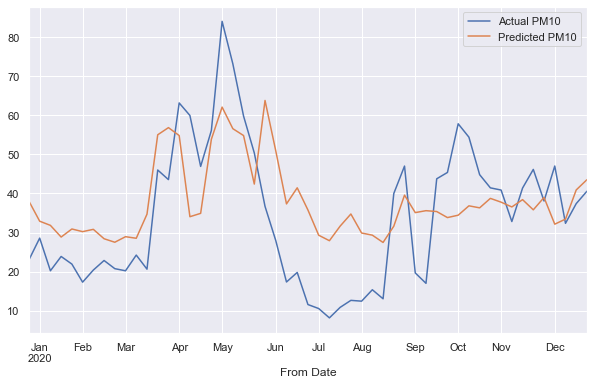

In [65]:
test['Ozone'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')

In [66]:
np.sqrt(mean_squared_error(test['Ozone'],X['pred']))

14.02297037339056

In [67]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 10.84121806222552
MSE: 184.3369146489074
RMSE: 13.577073125269209
R-Squared: 0.6133371679055253


In [68]:
mae = metrics.mean_absolute_error(test['PM1'],X['pred'])
mse = metrics.mean_squared_error(test['PM1'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM1'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 129.21790307858592
MSE: 29005.49869351188
RMSE: 170.31000761409143
R-Squared: -1.4460735645536897


In [69]:
import pickle
filename = 'PM10_forest3y.sav'
pickle.dump(forest, open(filename, 'wb'))

In [70]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.6133371679055253


# 3rd plot

In [71]:
testcase = pd.DataFrame()

In [72]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [73]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [74]:
testcase

,test,pred,Corrected
99,38.187143,38.463866,24.886792
207,23.017143,38.007731,24.430658
164,12.685714,47.281947,33.704874
157,16.544286,30.861768,17.284694
84,24.952857,26.697813,13.120740
158,16.497143,28.867711,15.290638
61,56.194286,66.879601,53.302528
134,22.034286,27.762279,14.185206
30,44.411429,35.735756,49.312829
4,49.721429,43.720214,57.297287


<AxesSubplot:>

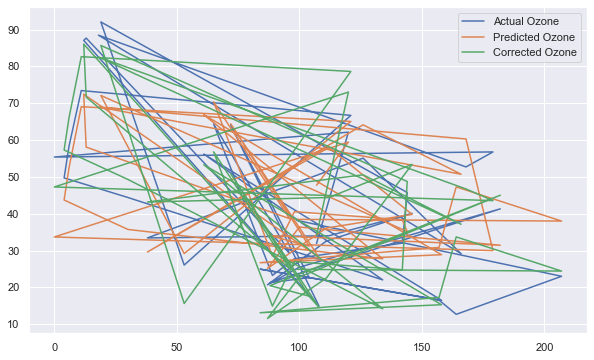

In [75]:
testcase['test'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted Ozone')
testcase["Corrected"].plot(legend=True, label='Corrected Ozone')

In [76]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8537476292237995

In [77]:
test2020=pd.DataFrame()

In [78]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [79]:
test2020.index=test.index

In [80]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

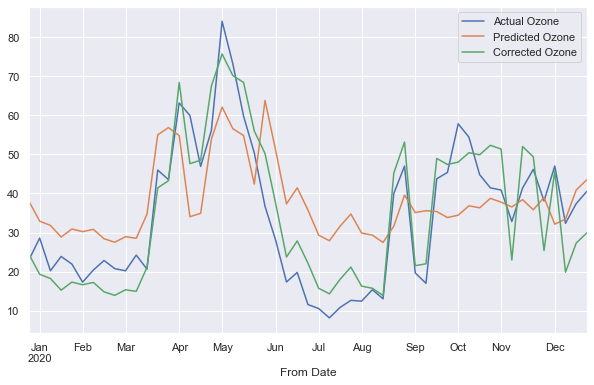

In [81]:
test2020['test'].plot(legend=True, label='Actual Ozone', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted Ozone')
test2020["Corrected"].plot(legend=True, label='Corrected Ozone')

In [82]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.8349124639888221